
# TRABAJO PRÁCTICO FINAL - PORGRAMACIÓN I - GRUPO ROMA

# Presentación


---



 **Integrantes:** 

*   **Perrone, Martín - P-5197/7**
*   **Valeri, Lara R. - V-3059/7**
*  **Vigo, Santiago - V-3062/7**

---
**Comisión 1**
---

**Ciudad: Roma- Italia**

---
**Links:**


*   Csv: [Datos Roma](http://data.insideairbnb.com/italy/lazio/rome/2022-06-07/data/listings.csv.gz)
*   GoogleC Colab: [TP FINAL - GRUPO ROMA](https://colab.research.google.com/drive/1DSFbooMPmN2mNrxW8lytokY_sYPMACre?usp=sharing)


---





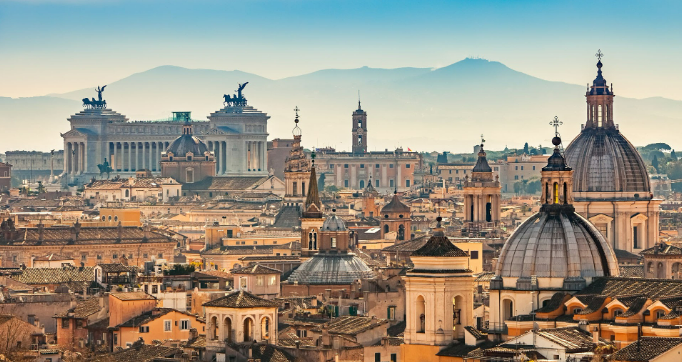


# Problema

---





*   **Descripción del problema:** A partir de los datos se busca dar información importante sobre los hospedajes en la ciudad de Roma - Italia y mostrar gráficos que permitan visualizar la información obtenida.
*   **Datos**: Los datos sobre los que se trabaja en este proyecto han sido extraídos del sitio:
http://insideairbnb.com/explore, correspondientes a la ciudad en cuestión.


*   **Preguntas:**

1. ¿Cuántos hospedajes de cada tipo hay? ¿Cuál es el precio promedio por barrio y por tipo?
2. ¿Qué barrio/s tiene/n la mayor cantidad de hospedajes? Y, ¿cuál es esa cantidad? ¿Cuál/es tiene/n la menor cantidad? Y, ¿cuál es esa cantidad?
3. Cantidad de hospedajes que no tienen restricciones en cuanto a cantidad de noche en proporción con el total. Por barrio y en total. La mayoría de los que tienen restricciones, ¿de cuántas noches (promedio)?





# Estructuras de Datos

---



En este proyecto se utilizan las siguientes estrucuras de datos:


*   Listas
*   Diccionarios
*   Tuplas





A continuación se encuentra el código que realizamos para leer y almacenar los datos necesarios para dar respuesta a las preguntas

In [ ]:
#Funciones para completar la lista de datos globales

import csv #Este módulo nos sirve para abrir y leer el archivo csv donde tenemos los datos 

#Diccionario global que almacena el indice de lacolumna que tiene el dato dentro del archivo
dic_indices_datos = {} #{Key= nombre de la columna de los datos, Value = indice dentro de la tabla}

#Diccionario que contiene los datos que se necesitan para dar respuesta a las preguntas
dic_datos_global = {} #{key = nombre de columna del archivo (ej:price ), value = lista con los datos de la columna del csv}


#Esta tupla global almacena los nombres de las columas del archivo que se necesitan para completar el tp
tupla_global_datos_necesarios = ('neighbourhood_cleansed','room_type','price','minimum_nights')


def llenar_diccionario_indices(row): #en esta función después entra solo la primera fila lde csv

  """
     *brief = Completa la variable global dic_indices_datos. 
     *parameter row = la fila 0 del archivo que se esta leyendo.
     *return -
  """
  for i in row:
    dic_indices_datos[i] = row.index(i)
      
#La función de arriba no llena solo el dic con las columnas que necesitamos, si no con todos.

    
def obtener_indices_que_necesito(*arg):

  """
     *brief = Se encarga de buscar y devolver el numero de indice de la columna del dato que se necesita 
     *parameter *arg = parametros ilimitados. 
     *return lista_datos = lista con los indices de las columnas solicitadas por parametros
  """
  lista_datos = []
  #Segun la cantidad de parametros que hayan llegado, intenta recorrer el diccionario de indices global y 
  #agrega su indice a la lista
  for k in arg:
    try:
      lista_datos.append(dic_indices_datos[k])
    except:
      pass

  return lista_datos


def llenar_datos_globales(row):

  """
     *brief = Se encarga de completar la variable dic_datos_global con sus respectivos datos. Primero chequea si la columna existe en el
     diccionario, si no es asi, la agrega al mismo. Una vez hecho esto, agrega en la lista el valor de la columna
     *parameter row = fila de datos.
     *return -
  """
  indice_actual = 0 #guarda el contador del indice del for
  lista_indices = []
  #Creamos una lista con los indices de columna de los datos que necesitamos, utilizando la función creada anteriormente
  #lista_indices contendrá, de manera ordenada los índices de las columnas de interes
  lista_indices = obtener_indices_que_necesito('neighbourhood_cleansed','room_type','price','minimum_nights')
   
  #Comenzamos a recorrer la fila de datos
  for i in row:
    #Por cada dato, necesito revisar si su indice coincide con alguno de los indices que necesito
    for x in range(0,len(tupla_global_datos_necesarios)):
      if indice_actual == lista_indices[x]:
        if i[0] == '$': #Esto es para sacar el signo pesos del precio
          i = float(i[1:].replace(",",""))

        if tupla_global_datos_necesarios[x] in dic_datos_global.keys():
          listaBarrios = dic_datos_global[tupla_global_datos_necesarios[x]]
          listaBarrios.append(i)
          dic_datos_global[tupla_global_datos_necesarios[x]] = listaBarrios
        else:
          listaBarrios = []
          listaBarrios.append(i)
          dic_datos_global[tupla_global_datos_necesarios[x]] = listaBarrios

        #si el indice coincidio, no tiene sentido seguir iterando el range  
        break
    indice_actual = indice_actual + 1
  

def obtener_lista_de_datos(*arg):
  """
     *brief = Devuelve una lista con listas de datos. En base a la columna solicitada por parametro, 
      devuelve su lista de datos correspondiente
     *parameter *arg = argumentos de los datos solicitados
     *return lista_con_listas = lista con listas. Los datos de cada parametro seran devueltos en una 
      sublista ordenada segun el orden del parametro
  """
  lista_con_listas = []
  lista_con_datos = []

  for k in arg:
    try:
      lista_con_datos = dic_datos_global[k]
      lista_con_listas.append(lista_con_datos)
    except:
      pass

  return lista_con_listas
      

def leer_archivo_completar_datos(nombreArchivo):

  """
     *brief = Se encarga de abrir un archivo y parsearlo completandolo con los datos requeridos 
     por la tupla definida globalmente
     *parameter nombreArchivo = nombre del archivo que se quiere abrir
     *return -
  """

  contador = 0
  with open(nombreArchivo) as File:
        reader = csv.reader(File, delimiter=',')
        for row in reader:
          #si es la primera fila, completo el diccionario de los datos
          if contador == 0:
            llenar_diccionario_indices(row) #este diccionario contiene los nombres y los indices de la primera fila
          else:
            llenar_datos_globales(row)

          contador = contador + 1

#Descomentar las siguientes 4 lineas para ver un ejemplo
leer_archivo_completar_datos('listings.csv')
for j in dic_datos_global:
   print('Key: {} datos: {}'.format(j,dic_datos_global[j]))


#Coasas de prueba para después borrar
print("El diccionario dic_indices_datos contiene: ")
print(dic_indices_datos)


Key: neighbourhood_cleansed datos: ['VIII Appia Antica', 'I Centro Storico', 'I Centro Storico', 'I Centro Storico', 'II Parioli/Nomentano', 'I Centro Storico', 'I Centro Storico', 'I Centro Storico', 'I Centro Storico', 'I Centro Storico', 'XIII Aurelia', 'I Centro Storico', 'I Centro Storico', 'VII San Giovanni/Cinecittà', 'I Centro Storico', 'I Centro Storico', 'I Centro Storico', 'V Prenestino/Centocelle', 'I Centro Storico', 'I Centro Storico', 'XIV Monte Mario', 'XIII Aurelia', 'I Centro Storico', 'I Centro Storico', 'XII Monte Verde', 'IX Eur', 'I Centro Storico', 'IV Tiburtina', 'II Parioli/Nomentano', 'I Centro Storico', 'II Parioli/Nomentano', 'II Parioli/Nomentano', 'I Centro Storico', 'XV Cassia/Flaminia', 'I Centro Storico', 'VIII Appia Antica', 'XII Monte Verde', 'VIII Appia Antica', 'V Prenestino/Centocelle', 'XII Monte Verde', 'I Centro Storico', 'I Centro Storico', 'XII Monte Verde', 'I Centro Storico', 'I Centro Storico', 'II Parioli/Nomentano', 'I Centro Storico', 'I

# Módulos

---



En este proyecto se utilizan los siguientes módulos de Python:


*   matplot ---> para crear gráficos
*   pandas ---> para crear gráficos
*   csv ---> para leer el archivo csv donde tenemos la información de la ciudad.





In [ ]:
#Importamos matplot para graficar
import matplotlib.pyplot as plt
 
#Importamos pandas para poder ordenar los datos que voy a graficar
import pandas as pd

#csv lo importamos en la sección anterior para poder obtener los datos correspondientes del archivo

# Pregunta 1
---


¿Cuántos hospedajes de cada tipo hay? ¿Cuál es el precio promedio por barrio y por tipo?

¿Cuántos hospedajes de cada tipo hay?

Cantidad de hospedajes por tipo:  

Private room : 7762
Entire home/apt : 15904
Hotel room : 906
Shared room : 136


En total, en Roma hay 4 tipos de hospedajes y 24708 hospedajes




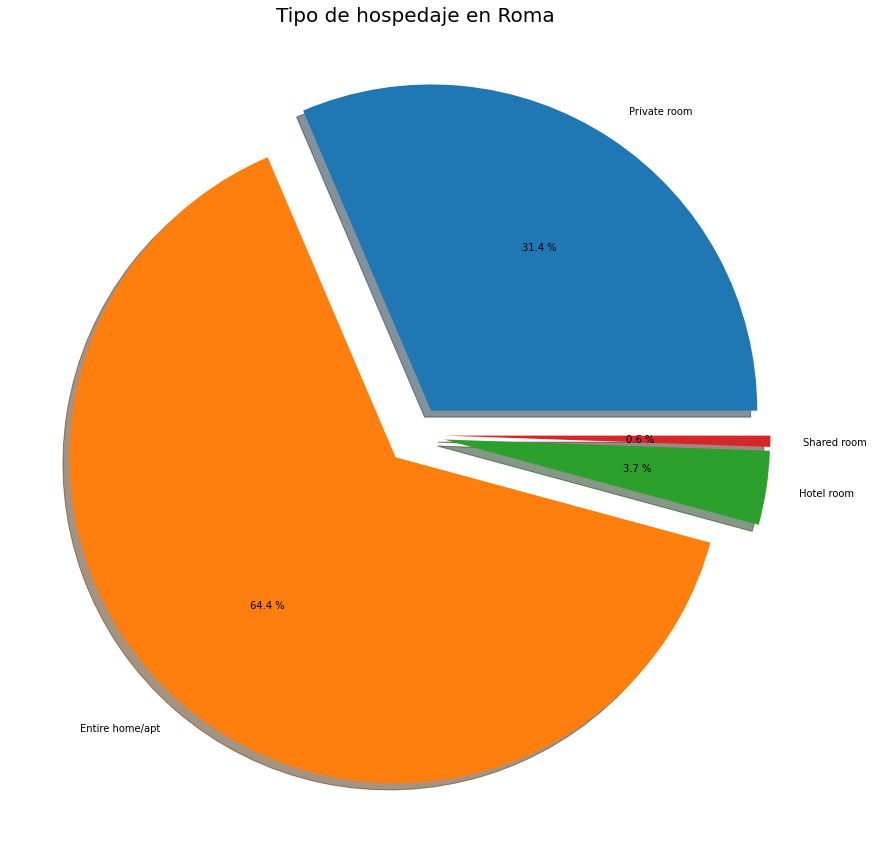

In [ ]:

def cant_hospedaje_por_tipo():
  
  """
  La función cant_hospedaje_por_tipo crea un diccionario donde las keys son los nombres de los tipos de hospedaje
  y los values la cantidad de cada uno. No recibe ningun argumento
  """ 
  cant_tipo_hospedaje = {}
  #Del dic global solo necesitamos los datos correspondientes a 'room_type'
  #Es la posición 1 de la tulpa: tupla_global_datos_necesarios
  for hospedaje in dic_datos_global[tupla_global_datos_necesarios[1]]:
    #El if verifica si el tipo de hospedaje ya esta en el dic, si esta le suma 1, si no lo crea y lo inicia en 1
    if hospedaje in cant_tipo_hospedaje.keys():
      cant_tipo_hospedaje[hospedaje] += 1
    else:
      cant_tipo_hospedaje[hospedaje] = 1
  return cant_tipo_hospedaje

cant_por_tipo_hospedaje = cant_hospedaje_por_tipo()

cont = 0
total_tipo_hospedajes = 0
print("Cantidad de hospedajes por tipo:  \n")
for hospe in cant_por_tipo_hospedaje.keys():
  cont= cont +1
  total_tipo_hospedajes = total_tipo_hospedajes + cant_por_tipo_hospedaje[hospe]
  print(hospe, ":", cant_por_tipo_hospedaje[hospe])

print("\n")
print("En total, en Roma hay", cont, "tipos de hospedajes y", total_tipo_hospedajes, "hospedajes")
print("\n")


#Representación con gráfico


def grafico_circular(dicc_info, ciudad = 'Roma'):
  """
  Esta función recibe un diccionario y realiza un gráfico circular
  con la información del mismo
  """

  plt.figure(figsize = (30,15))
  explode = (0.09,0.09,0.09,0.09) #Esto es para que separe las parted del gráfico de torta
  plt.pie(dicc_info.values(), explode=explode, labels  = dicc_info.keys(), autopct="%0.1f %%", shadow=True); 
  #shadow = True le da sombra al gráfico
  plt.title('Tipo de hospedaje en '+ciudad,fontsize=20);

grafico_circular(cant_por_tipo_hospedaje)

¿Cuál es el precio promedio por barrio?

Precio promedio por barrio:  

VIII Appia Antica :  79.71 €
I Centro Storico :  156.05 €
II Parioli/Nomentano :  120.39 €
XIII Aurelia :  116.35 €
VII San Giovanni/Cinecittà :  83.24 €
V Prenestino/Centocelle :  76.4 €
XIV Monte Mario :  81.57 €
XII Monte Verde :  95.63 €
IX Eur :  97.19 €
IV Tiburtina :  71.79 €
XV Cassia/Flaminia :  106.67 €
III Monte Sacro :  77.09 €
XI Arvalia/Portuense :  74.85 €
VI Roma delle Torri :  70.34 €
X Ostia/Acilia :  87.41 €




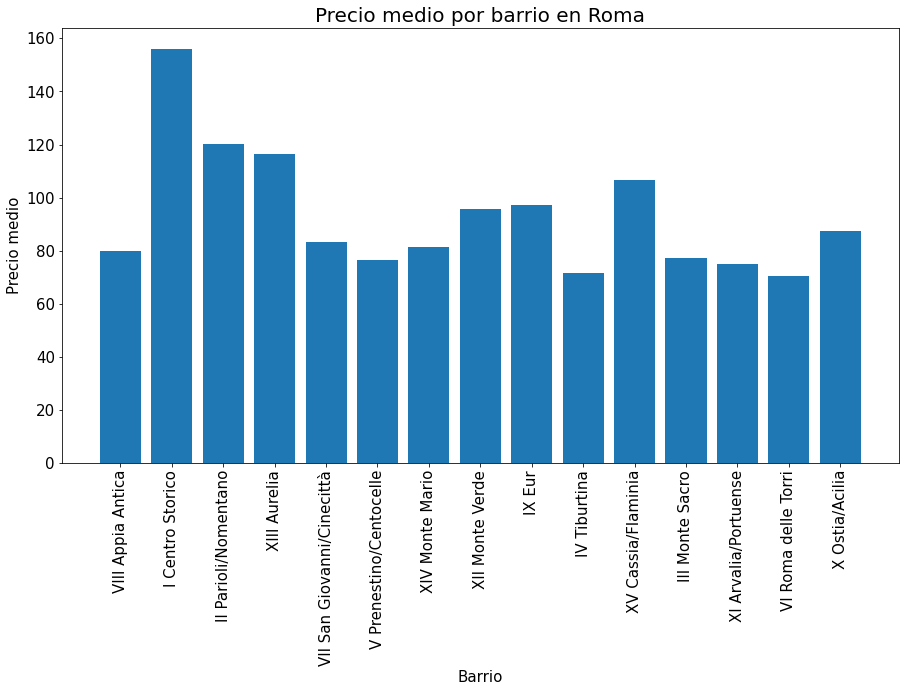

In [ ]:

def precio_promedio_por_barrio():
  
  """
  La función precio_promedio_por_barrio crea un diccionario donde las keys son los nombres de los barrios
  y los values el precio promedio de hospedajes por barrio.
  """ 
  precio_barrio = {}
  lista_barrios = dic_datos_global[tupla_global_datos_necesarios[0]]
  lista_precio = dic_datos_global[tupla_global_datos_necesarios[2]]
  #Del dic global solo necesitamos los datos correspondientes a 'Neighbourd_clansed' y 'price'
  #Son las posiciones 1 y 2 de la tulpa: tupla_global_datos_necesarios
  count = 0
  for barrio in lista_barrios:
    if barrio in precio_barrio.keys():
      precio_barrio[barrio].append(lista_precio[count])
      count +=1
    else:
      precio_barrio[barrio] = [lista_precio[count]]
      count +=1
  
  precio_promedio_x_barrio = {}
  for i in precio_barrio:
    precio_promedio_x_barrio[i] = round(sum(precio_barrio[i]) / len(precio_barrio[i]),2)
  
  return precio_promedio_x_barrio 

prom_precio = precio_promedio_por_barrio()

cont = 0
total_tipo_hospedajes = 0
print("Precio promedio por barrio:  \n")
for bar in prom_precio.keys():
  print(bar,": ",prom_precio[bar],"€")

print("\n")


#Representación con gráfico

def grafico_columna(dicc_info):
  """
  Esta función recibe un diccionario y realiza un gráfico de columnas
  con la información del mismo
  """


  plt.figure(figsize = (15,8))
  plt.bar(dicc_info.keys(), dicc_info.values())
  plt.xticks(rotation = 90, fontsize=15);
  plt.yticks(fontsize=15);
  plt.xlabel('Barrio',fontsize=15)
  plt.ylabel('Precio medio',fontsize=15)
  plt.title('Precio medio por barrio en Roma',fontsize=20);
  plt.savefig('imagen.png', bbox_inches = 'tight')

grafico_columna(prom_precio)





¿Cuál es el precio promedio por tipo de hospedaje?

Precio promedio por hospedaje:  

Private room : 103.14 €
Entire home/apt : 141.01 €
Hotel room : 126.95 €
Shared room : 49.21 €




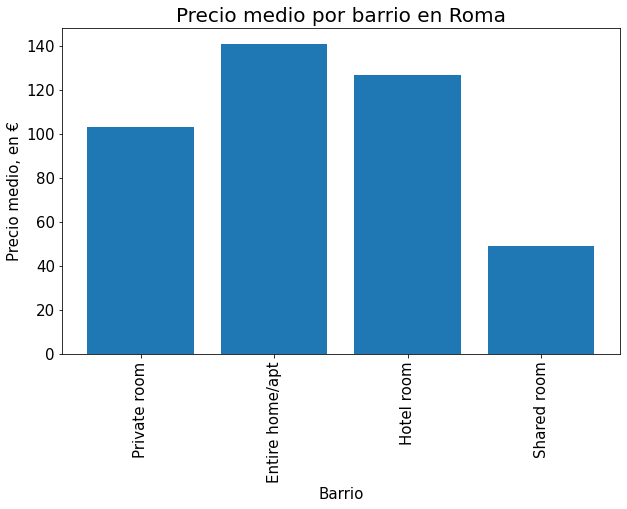

In [ ]:
def precio_promedio_por_hospedaje():
  
  """
  La función precio_promedio_por_hospedaje crea un diccionario donde las keys son los tipos de hospedajes
  y los values el precio promedio por cada tipo.
  """ 
  precio_hospedaje = {}
  lista_hospedaje = dic_datos_global[tupla_global_datos_necesarios[1]]
  lista_precio = dic_datos_global[tupla_global_datos_necesarios[2]]
  #Del dic global solo necesitamos los datos correspondientes a 'room_type' y 'price'
  #Son las posiciones 1 y 2 de la tulpa: tupla_global_datos_necesarios
  count = 0
  for hospedaje in lista_hospedaje:
    if hospedaje in precio_hospedaje.keys():
      precio_hospedaje[hospedaje].append(lista_precio[count])
      count +=1
    else:
      precio_hospedaje[hospedaje] = [lista_precio[count]]
      count +=1
  
  precio_promedio_x_hospedaje = {}
  for i in precio_hospedaje:
    precio_promedio_x_hospedaje[i] = round(sum(precio_hospedaje[i]) / len(precio_hospedaje[i]),2)
  
  return precio_promedio_x_hospedaje

prom_precio = precio_promedio_por_hospedaje()

cont = 0
total_tipo_hospedajes = 0
print("Precio promedio por hospedaje:  \n")
for bar in prom_precio.keys():
  print(bar, ":", prom_precio[bar], "€")

print("\n")  

#Representación con gráfico

def grafico_columna(dicc_info):
  """
  Esta función recibe un diccionario y realiza un gráfico de columnas
  con la información del mismo
  """


  plt.figure(figsize = (10,6))
  plt.bar(dicc_info.keys(), dicc_info.values())
  plt.xticks(rotation = 90, fontsize=15);
  plt.yticks(fontsize=15);
  plt.xlabel('Barrio',fontsize=15)
  plt.ylabel('Precio medio, en €',fontsize=15)
  plt.title('Precio medio por barrio en Roma',fontsize=20);
  plt.savefig('imagen.png', bbox_inches = 'tight')

grafico_columna(prom_precio)  

# **Pregunta 2**


---


¿Qué barrio/s tiene/n la mayor cantidad de hospedajes? Y, ¿cuál es esa cantidad? ¿Cuál/es tiene/n la menor cantidad? Y, ¿cuál es esa cantidad?

In [ ]:
def cant_hospedaje_por_barrio():
  
  """
  La función cant_hospedaje_por_barrio crea un diccionario donde las keys son los nombres de los barios
  y los values la cantidad de hospedajes que posee.
  """ 
  cant_barrio = {}
  #De el dic global solo necesitamos los datos correspondientes a 'Neighbourd_clansed'
  #Es la posición 0 de la tulpa: tupla_global_datos_necesarios
  for barrio in dic_datos_global[tupla_global_datos_necesarios[0]]:
    if barrio in cant_barrio.keys():
      cant_barrio[barrio] += 1
    else:
      cant_barrio[barrio] = 1
  return cant_barrio

cant_por_barrio = cant_hospedaje_por_barrio()

cont = 0
total_hospedajes = 0
print("Cantidad de hospedajes por barrio:  \n")
for bar in cant_por_barrio.keys():
  cont= cont +1
  total_hospedajes = total_hospedajes + cant_por_barrio[bar]
  print(bar, ":", cant_por_barrio[bar])

print("\n")
print("En total, en Roma hay ", cont, "barrios y ", total_hospedajes, "hospedajes")



Cantidad de hospedajes por barrio:  

VIII Appia Antica : 698
I Centro Storico : 13535
II Parioli/Nomentano : 1752
XIII Aurelia : 1470
VII San Giovanni/Cinecittà : 1788
V Prenestino/Centocelle : 880
XIV Monte Mario : 483
XII Monte Verde : 1149
IX Eur : 322
IV Tiburtina : 458
XV Cassia/Flaminia : 449
III Monte Sacro : 388
XI Arvalia/Portuense : 419
VI Roma delle Torri : 210
X Ostia/Acilia : 707


En total, en Roma hay  15 barrios y  24708 hospedajes


In [ ]:
#Veamos ahora cuál es el barrio que tiene más hospedajes y cuál es esa cantidad
#Veamos ahora cuál es el barrio que tiene menos hospedajes y cuál es esa cantidad







#pregunta agregada
def tipo_hospedaje_por_barrio():

  diccionario_tipo_hos_por_barrio = {}
  diccionario_por_barrios = {} 
  
  lista_de_listas_temporal = []
  lista_nombre_barrio = []
  lista_tipo_hospedaje = []

  lista_de_listas_temporal = obtener_lista_de_datos('neighbourhood_cleansed','room_type')

  if len(lista_de_listas_temporal) == 2:
    lista_nombre_barrio = lista_de_listas_temporal[0]
    lista_tipo_hospedaje = lista_de_listas_temporal[1]
  else:
    return

  indice = 0
  for i in lista_nombre_barrio:
    #Completo el diccionario. Reviso si el barrio existe, de no ser asi, lo agrego
    if i in diccionario_por_barrios.keys():
      lista_datos_dic = diccionario_por_barrios[i]
      lista_datos_dic.append(lista_tipo_hospedaje[indice])
      diccionario_por_barrios[i] = lista_datos_dic
    else:
      lista_datos_dic = []
      lista_datos_dic.append(lista_tipo_hospedaje[indice])
      diccionario_por_barrios[i] = lista_datos_dic

    indice = indice + 1


  #Ahora agrupo el tipo de hospedajes
  dic_temporal_tipo_hospedaje_por_barrio = {}

  ##Recorro la lista de datos de cada barrio, y creo un diccionario temporal [key=tipo hospedaje, value = cantidad]
  for x in diccionario_por_barrios.keys():
    dic_temporal_tipo_hospedaje_por_barrio = {}
    for tipo_hospedaje in diccionario_por_barrios[x]:
      if tipo_hospedaje in dic_temporal_tipo_hospedaje_por_barrio.keys():
        dic_temporal_tipo_hospedaje_por_barrio[tipo_hospedaje] += 1
      else:
        dic_temporal_tipo_hospedaje_por_barrio[tipo_hospedaje] = 1

    
    #Recorro el diccionario y busco el tipo de hospedaje predominante
    valorTemporal = 0
    tipo_hospedaje_predominante_temp = ''
    lista_resultado =[]
    for tipo_hospedaje_predominante in dic_temporal_tipo_hospedaje_por_barrio.keys():
      if dic_temporal_tipo_hospedaje_por_barrio[tipo_hospedaje_predominante] >valorTemporal:
        valorTemporal = dic_temporal_tipo_hospedaje_por_barrio[tipo_hospedaje_predominante]
        tipo_hospedaje_predominante_temp = tipo_hospedaje_predominante
        

    #Agrego el diccionario al resultado 
    lista_resultado.append(tipo_hospedaje_predominante)
    lista_resultado.append(valorTemporal)
    diccionario_tipo_hos_por_barrio[x] = lista_resultado

  return diccionario_tipo_hos_por_barrio





def max_min (dic_barrio):
  """
  Esta función recibe un diccionario donde la clave es el nombre del barrio 
  y el valor es la cantidad de hospedajes que tiene ese barrio y devuelve
  la cantidad de máxima y mínima de hospedajes
  """
  cant = []
  for barrio in dic_barrio:
    cant.append(dic_barrio[barrio]) #esto nos crea una lista donde solo están guardadas las cantidades
    #De esa lista vamos a obetener el valor máx y mín
    maximo = max(cant)
    minimo = min(cant)
  return maximo, minimo



def barrios_max_min(dicc_por_barrio):
  """
  Esta función recibe como entrada un diccionario donde la clave es el nombre
  del barrio, y el valor la cantidad e hospedajes de ese barrio. Muestra por
  pantalla que barrio/s tiene/n la mayor cantidad de hospedajes y cuál es esa
  cantidad. Idem para la cantidad mínima.
  """

  dic_tipo_max_hospedajes_por_barrio = tipo_hospedaje_por_barrio()

  lista_barrios_max_cant = []
  lista_barrios_min_cant = []

  for barrio in dicc_por_barrio:
    if dicc_por_barrio[barrio] == cant_max:
      lista_barrios_max_cant.append(barrio)
    if dicc_por_barrio[barrio] == cant_min:
      lista_barrios_min_cant.append(barrio)  
  
  if len(lista_barrios_max_cant) == 1:
    print("El barrio", lista_barrios_max_cant[0], "es el que tiene la mayor cantidad de hospedajes con un total de: ", cant_max)
  else:
    print("Los barrios con la mayor cantidad de hospedajes son: ")
    for i in range(len(lista_barrios_max_cant)):
      print(lista_barrios_max_cant[i])
      print("Cada uno de estos barrios tiene una cantidad de ", cant_max, "de hospedajes.")  
  if len(lista_barrios_min_cant) == 1:
    print("El barrio", lista_barrios_min_cant[0], "es el que tiene la menor cantidad de hospedajes con un total de: ", cant_min)
  else:
    print("Los barrios con la menor cantidad de hospedajes son: ")
    for i in range(len(lista_barrios_min_cant)):
      print(lista_barrios_min_cant[i])
      print("Cada uno de estos barrios tiene una cantidad de", cant_min, "hospedaje(s).")  

  for nombre_barrio in dic_tipo_max_hospedajes_por_barrio.keys():
    print("En en barrio {} el tipo de hospedaje predominante es: {} con una cantidad de {}".format(nombre_barrio,dic_tipo_max_hospedajes_por_barrio[nombre_barrio][0],dic_tipo_max_hospedajes_por_barrio[nombre_barrio][1])) 
#A continuación utilizamos todas las funciones creadas


cant_max, cant_min = max_min(cant_por_barrio)

print("La cantidad máxima de hospedajes que posee un barrio es de :")
print(cant_max, "\n")
print("La cantidad mínima de hospedajes que posee un barrio es de :")
print(cant_min, "\n")

barrios_max_min(cant_por_barrio)


















La cantidad máxima de hospedajes que posee un barrio es de :
13535 

La cantidad mínima de hospedajes que posee un barrio es de :
210 

El barrio I Centro Storico es el que tiene la mayor cantidad de hospedajes con un total de:  13535
El barrio VI Roma delle Torri es el que tiene la menor cantidad de hospedajes con un total de:  210
En en barrio VIII Appia Antica el tipo de hospedaje predominante es: Hotel room con una cantidad de 396
En en barrio I Centro Storico el tipo de hospedaje predominante es: Shared room con una cantidad de 9067
En en barrio II Parioli/Nomentano el tipo de hospedaje predominante es: Shared room con una cantidad de 1011
En en barrio XIII Aurelia el tipo de hospedaje predominante es: Shared room con una cantidad de 970
En en barrio VII San Giovanni/Cinecittà el tipo de hospedaje predominante es: Shared room con una cantidad de 1008
En en barrio V Prenestino/Centocelle el tipo de hospedaje predominante es: Shared room con una cantidad de 529
En en barrio XIV Mont

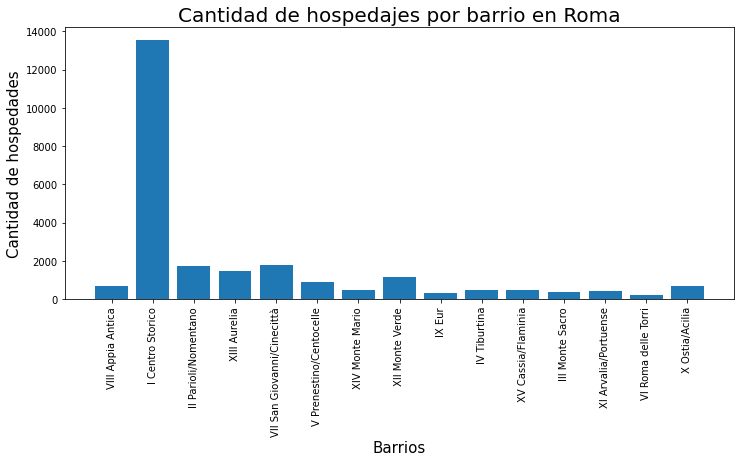

In [ ]:
def graficos_2(dicc_para_graficar):
  """
  Esta función recibe un diccionario y realiza un gráfico de barras
  con la información del mismo
  """
 
  plt.figure(figsize = (12,5))
  plt.bar(dicc_para_graficar.keys(), dicc_para_graficar.values())
  plt.xticks(rotation = 90);
  plt.xlabel('Barrios',fontsize=15)
  plt.ylabel('Cantidad de hospedades',fontsize=15)
  plt.title('Cantidad de hospedajes por barrio en Roma',fontsize=20);
  plt.savefig('imagen.png', bbox_inches = 'tight')
 
graficos_2(cant_por_barrio)

# **Pregunta 3** 


---


Cantidad de hospedajes que no tienen restricciones en cuanto a cantidad de noche en proporción con el total. Por barrio y en total. La mayoría de los que tienen restricciones, ¿de cuántas noches (promedio)?

 
------------ TOTAL ---------------------
cantidad_sin_restriccion: 9887
           cantidad_con_restriccion: 14821
           promedio_noches_minimas: 5.388097969097902
           sumatoria_noches_minimas: 79857
           


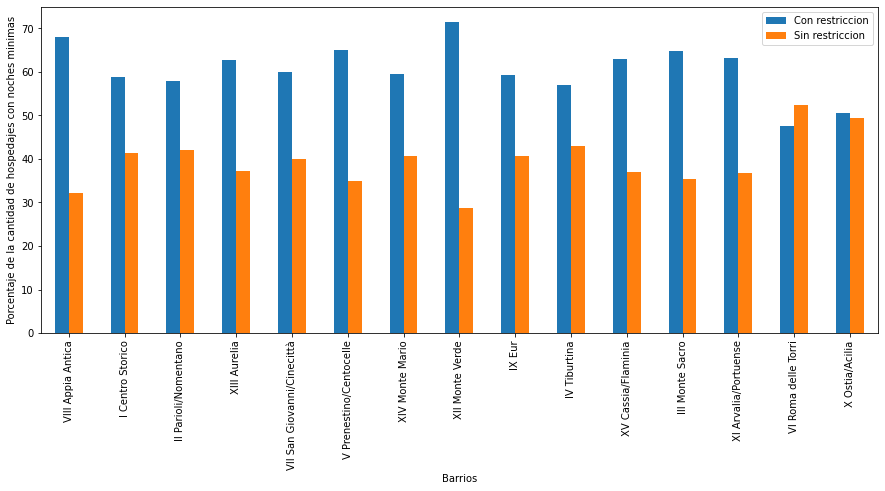

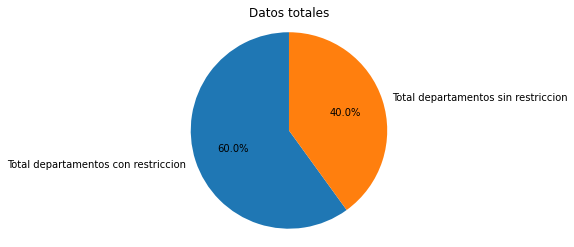

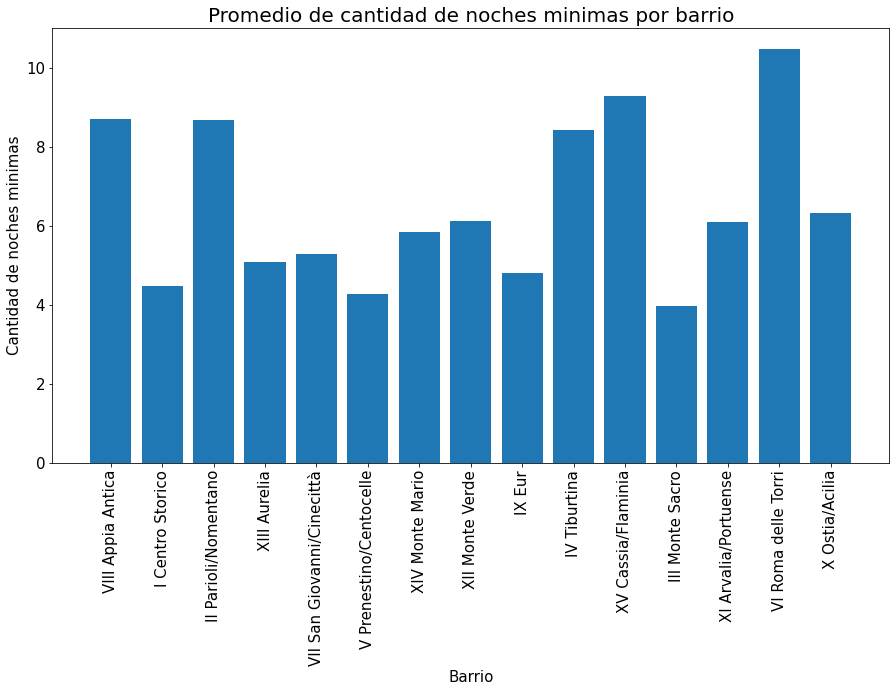

In [ ]:
#Importamos matplot para graficar
#import matplotlib.pyplot as plt
#Importamos pandas para poder ordenar los datos que vamos a graficar
#import pandas as pd


def clasificar_datos_por_barrio(dic_barrios):
  """
     *brief = Se encarga de tomar los datos globales y armar un diccionario solo con los datos necesarios para esta pregunta
     *parameter dic_barrios = Diccionario donde se van a almacenar los datos (dic_barrios([key= nombreBarrio, value= lista con datos de cantidad de noches minimas]))
     *return -
  """
  resultado = False
  
  lista_datosTemp = obtener_lista_de_datos(tupla_global_datos_necesarios[0],tupla_global_datos_necesarios[3])
  lista_barrios = []
  lista_noches_minimas = []
  #lista_datosTemp tiene dos listas: correspondientes a los datos que se necesitan
  #lista_barrios, es una lista que tiene todos los barrios
  #lista_noches_minimas, es una lista que contiene la cant de noches

  #Asigno los valores a las listas
  if len(lista_datosTemp) == 2 :
    lista_barrios = lista_datosTemp[0]
    lista_noches_minimas = lista_datosTemp[1]
    
  else:
    return resultado

  indice = 0
  for i in lista_barrios:
    #Completo el diccionario. Reviso si el barrio existe, de no ser asi, lo agrego
    if i in dic_barrios.keys():
      lista_datos_dic = dic_barrios[i]
      lista_datos_dic.append(lista_noches_minimas[indice])
      dic_barrios[i] = lista_datos_dic
    else:
      lista_datos_dic = []
      lista_datos_dic.append(lista_noches_minimas[indice])
      dic_barrios[i] = lista_datos_dic

    indice = indice + 1
  
  resultado = True
  return resultado


def calcular_cantidad_nochesMinimas_por_barrio(lista_datos_de_barrio):

  """
     *brief = Calcula cuantos hospedajes existen con estadia minima (la cantidad de noches >1 significan 
     que tienen una estadia minima) y luego calcula el
     promedio de las noches minimas
     *parameter lista_datos_de_barrio = lista con los datos de noches minimas de un barrio
     *return [0] cantidad_sin_restriccion : cantidad de hospedajes sin restriccion de noches minimas
             [1] cantidad_con_restriccion : cantidad de hospedajes con restriccion de noches minimas
             [2] promedio_noches_minimas : promedio de noches minimas de los hospedajes que poseen restricciones
             [3] sumatoria_noches_minimas : total de las noches minimas (valor util para calcular el promedio)
  """
  cantidad_sin_restriccion = 0
  cantidad_con_restriccion = 0
  promedio_noches_minimas = 0
  sumatoria_noches_minimas = 0
  
  for i in lista_datos_de_barrio:
    if int(i) == 1:
      cantidad_sin_restriccion = cantidad_sin_restriccion + 1
    else:
      cantidad_con_restriccion = cantidad_con_restriccion + 1
      promedio_noches_minimas = promedio_noches_minimas + int(i)

  sumatoria_noches_minimas = promedio_noches_minimas
  promedio_noches_minimas = promedio_noches_minimas / cantidad_con_restriccion

  return cantidad_sin_restriccion,cantidad_con_restriccion,promedio_noches_minimas,sumatoria_noches_minimas


print(calcular_cantidad_nochesMinimas_por_barrio)




#Responde a la pregunta 3
def respuesta_pregunta_3():

  """
     *brief = Responde a la pregunta 3 del tp. Se encarga de calcular cuantos hospedajes existen con una cantidad de noches minimas y cuantos no.
     *parameter -
     *return -
  """

  dic_barrios_datos = {} #Diccionario de datos {key: nombre del barrio. value: lista con noches minimas} 

  #Listas utiles para calcular los totales
  cantidad_sin_restriccion_total =0
  cantidad_con_restriccion_total =0
  sumatoria_noches_minimas_total =0
  promedio_noches_minimas_total  =0 

  #Variables para graficar
  nombresBarrio_grafico = []
  cantidad_con_restriccion_barrios = []
  cantidad_sin_restriccion_barrios = []
  promedio_noches_minimas_barrios = []

  clasificar_datos_por_barrio(dic_barrios_datos)
  for i in dic_barrios_datos:
    nombresBarrio_grafico.append(i) #Agrego el nombre del barrio a la lista para graficar
    cantidad_sin_restriccion,cantidad_con_restriccion,promedio_noches_minimas,sumatoria_noches_minimas = calcular_cantidad_nochesMinimas_por_barrio(dic_barrios_datos[i])
    
    cantidad_con_restriccion_barrios.append(cantidad_con_restriccion*100/ (cantidad_con_restriccion+cantidad_sin_restriccion))
    cantidad_sin_restriccion_barrios.append(cantidad_sin_restriccion*100/ (cantidad_con_restriccion+cantidad_sin_restriccion))
    promedio_noches_minimas_barrios.append(promedio_noches_minimas)

    cantidad_sin_restriccion_total = cantidad_sin_restriccion + cantidad_sin_restriccion_total
    cantidad_con_restriccion_total = cantidad_con_restriccion_total + cantidad_con_restriccion
    sumatoria_noches_minimas_total = sumatoria_noches_minimas_total + sumatoria_noches_minimas
    promedio_noches_minimas_total = sumatoria_noches_minimas_total / cantidad_con_restriccion_total
    #print('---Barrio: {} ----------'.format(i))
    #print("""cantidad_sin_restriccion: {}
    #      cantidad_con_restriccion: {}
    #       promedio_noches_minimas: {}
    #       sumatoria_noches_minimas: {}
    #       """.format(cantidad_sin_restriccion,cantidad_con_restriccion,promedio_noches_minimas,sumatoria_noches_minimas))

  

  #Mostramos los resultados obtenidos para dar respuesta a la pregunta
  print(' ')
  print('------------ TOTAL ---------------------')
  print("""cantidad_sin_restriccion: {}
           cantidad_con_restriccion: {}
           promedio_noches_minimas: {}
           sumatoria_noches_minimas: {}
           """.format(cantidad_sin_restriccion_total,cantidad_con_restriccion_total,promedio_noches_minimas_total,sumatoria_noches_minimas_total))

  
  #Grafico de barras de los totales
  df = pd.DataFrame({
    'Barrios':nombresBarrio_grafico ,
    'Con restriccion':cantidad_con_restriccion_barrios ,
    'Sin restriccion': cantidad_sin_restriccion_barrios
  })

  df.plot(x="Barrios",width=0.5, y=["Con restriccion", "Sin restriccion"], kind="bar",figsize = (15,6),ylabel='Porcentaje de la cantidad de hospedajes con noches minimas')

  #Grafico de torta de los totales
  labels = 'Total departamentos con restriccion', 'Total departamentos sin restriccion'
  sizes = [cantidad_con_restriccion_total, cantidad_sin_restriccion_total]

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
  ax1.axis('equal')
  plt.title('Datos totales')

  plt.figure(figsize = (15,8))
  plt.bar(nombresBarrio_grafico, promedio_noches_minimas_barrios)
  plt.xticks(rotation = 90, fontsize=15);
  plt.yticks(fontsize=15);
  plt.xlabel('Barrio',fontsize=15)
  plt.ylabel('Cantidad de noches minimas',fontsize=15)
  plt.title('Promedio de cantidad de noches minimas por barrio',fontsize=20);




respuesta_pregunta_3()










#Pregunta agregada 

#Veamos ahora cuál es el barrio que tiene más hospedajes y cuál es esa cantidad
#Veamos ahora cuál es el barrio que tiene menos hospedajes y cuál es esa cantidad

def max_min (dic_barrio):
  """
  Esta función recibe un diccionario donde la clave es el nombre del barrio 
  y el valor es la cantidad de hospedajes que tiene ese barrio y devuelve
  la cantidad de máxima y mínima de hospedajes
  """
  cant = []
  for barrio in dic_barrio:
    cant.append(dic_barrio[barrio]) #esto nos crea una lista donde solo están guardadas las cantidades
    #De esa lista vamos a obetener el valor máx y mín
    maximo = max(cant)
    minimo = min(cant)
  return maximo, minimo











In [ ]:
lista = dic_datos_global[tupla_global_datos_necesarios[3]] 

cantidad_con_restriccion = 0
for i in lista:
    if int(i) > 1:
      cantidad_con_restriccion = cantidad_con_restriccion + 1
    
print(cantidad_con_restriccion)






14821
